In [1]:
!pip install uproot awkward lz4 xxhash
!pip install zfit
!pip install mplhep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import uproot
from numpy import *
import matplotlib
import matplotlib.pyplot as plt

f=uproot.open("/content/drive/MyDrive/B2HHH_MagnetUp.root")


In [3]:
f.keys()

['DecayTree;1']

In [4]:
tree=f["DecayTree"].arrays(library="np")

In [5]:
tree.keys()


dict_keys(['B_FlightDistance', 'B_VertexChi2', 'H1_PX', 'H1_PY', 'H1_PZ', 'H1_ProbK', 'H1_ProbPi', 'H1_Charge', 'H1_IPChi2', 'H1_isMuon', 'H2_PX', 'H2_PY', 'H2_PZ', 'H2_ProbK', 'H2_ProbPi', 'H2_Charge', 'H2_IPChi2', 'H2_isMuon', 'H3_PX', 'H3_PY', 'H3_PZ', 'H3_ProbK', 'H3_ProbPi', 'H3_Charge', 'H3_IPChi2', 'H3_isMuon'])

Text(0.5, 0, 'Momentum [MeV/c^2] ')

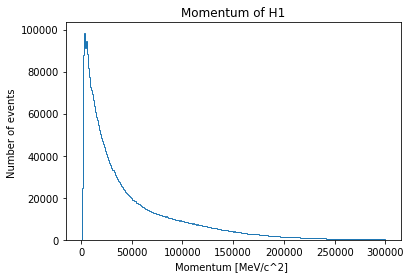

In [6]:
#total momentum of three daugheters
H1_ptot=sqrt(square(tree["H1_PX"])+square(tree["H1_PY"])+square(tree["H1_PZ"])) 
H2_ptot= sqrt(square(tree["H2_PX"])+square(tree["H2_PY"])+square(tree["H2_PZ"]))
H3_ptot= sqrt(square(tree["H3_PX"])+square(tree["H3_PY"])+square(tree["H3_PZ"]))

histName = H1_ptot
bins = 300
range = (0,300000)

plt.hist(histName,bins,range,histtype='step');

plt.title("Momentum of H1")
plt.ylabel("Number of events ")
plt.xlabel("Momentum [MeV/c^2] ")


Text(0.5, 0, 'Momentum [MeV/c^2] ')

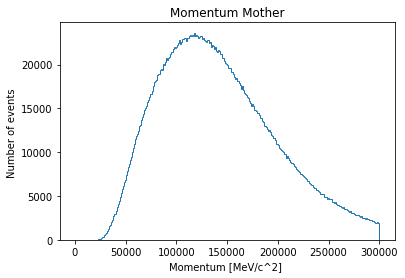

In [7]:
#total momentum mother
ptot_mother=sqrt((square(tree["H1_PX"]+tree["H2_PX"]+tree["H3_PX"]) + square(tree["H1_PY"]+tree["H2_PY"]+tree["H3_PY"]) + square(tree["H1_PZ"]+tree["H2_PZ"]+tree["H3_PZ"])))

histName = ptot_mother
bins = 300
range = (0,300000)

plt.hist(histName,bins,range,histtype='step');

plt.title("Momentum Mother")
plt.ylabel("Number of events ")
plt.xlabel("Momentum [MeV/c^2] ")


Text(0.5, 0, 'Mass [MeV/c^2] ')

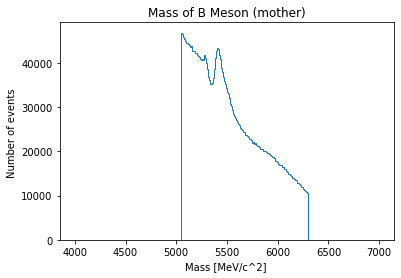

In [8]:
#plot a histogram of the range of masses of the B meson (mass mother)
mkaon = 493.677
E1 = sqrt(square(H1_ptot)+mkaon**2)
E2 = sqrt(square(H2_ptot)+mkaon**2)
E3 = sqrt(square(H3_ptot)+mkaon**2)
M_mother = sqrt(square(E1+E2+E3)-square(ptot_mother))

histName = M_mother
bins = 300
range = (4000, 7000)

plt.hist(histName,bins,range,histtype='step');

plt.title("Mass of B Meson (mother)")
plt.ylabel("Number of events ")
plt.xlabel("Mass [MeV/c^2] ")

#it almost corresponds to to the theoretical oorediction, however, there is one peak more 

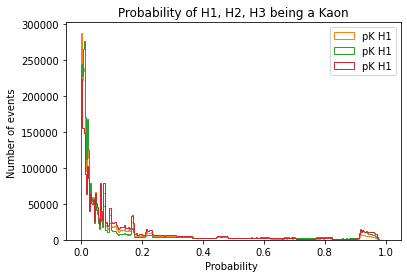

In [9]:
#probability Kaon
bins = 300
range = (0,1)

plt.hist(histName,bins,range,histtype='step');
plt.hist(tree["H1_ProbK"],bins,range,histtype='step',label='pK H1');
plt.hist(tree["H2_ProbK"],bins,range,histtype='step',label='pK H1');
plt.hist(tree["H3_ProbK"],bins,range,histtype='step',label='pK H1');

plt.title("Probability of H1, H2, H3 being a Kaon")
plt.ylabel("Number of events ")
plt.xlabel("Probability ")
plt.legend();
plt.show()

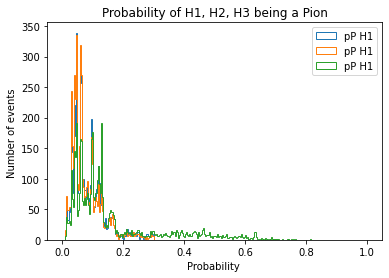

In [22]:
#probability Pion
bins = 300
range = (0,1)

plt.hist(tree["H1_ProbPi"],bins,range,histtype='step',label='pP H1');
plt.hist(tree["H2_ProbPi"],bins,range,histtype='step',label='pP H1');
plt.hist(tree["H3_ProbPi"],bins,range,histtype='step',label='pP H1');

plt.title("Probability of H1, H2, H3 being a Pion")
plt.ylabel("Number of events ")
plt.xlabel("Probability ")
plt.legend();
plt.show()

Text(0.5, 0, 'Chi2 ')

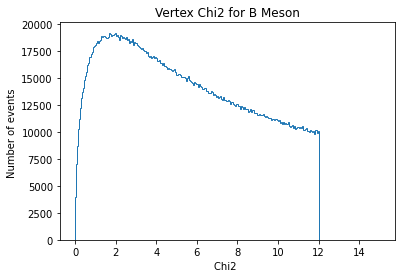

In [11]:
#plot of the B_VertexChi2
bins = 300
range = (0,15)

plt.hist(tree["B_VertexChi2"],bins,range,histtype='step');

plt.title("Vertex Chi2 for B Meson")
plt.ylabel("Number of events ")
plt.xlabel("Chi2 ")


In [12]:
#selecting probability Kaon (since the mass we've been working so far is from Kaon), low prob of being a Pion
selection=("(H1_ProbK>0.5)&(H2_ProbK>0.5)&(H3_ProbK>0.5)&(H1_isMuon==0)&(H2_isMuon==0)&(H3_isMuon==0)&(H1_ProbPi<0.3)&(H2_ProbPi<0.3)&(H1_ProbPi<0.3)")
cuttree=f["DecayTree"].arrays(library="np",cut=selection)

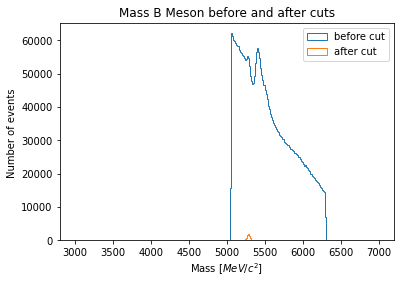

In [23]:
#post-cuts
H1_ptot_post=sqrt(square(cuttree["H1_PX"])+square(cuttree["H1_PY"])+square(cuttree["H1_PZ"]))
H2_ptot_post= sqrt(square(cuttree["H2_PX"])+square(cuttree["H2_PY"])+square(cuttree["H2_PZ"]))
H3_ptot_post= sqrt(square(cuttree["H3_PX"])+square(cuttree["H3_PY"])+square(cuttree["H3_PZ"]))

E1_post=sqrt(square(H1_ptot_post)+mkaon**2)
E2_post=sqrt(square(H2_ptot_post)+mkaon**2)
E3_post=sqrt(square(H3_ptot_post)+mkaon**2)
ptot_mother_post= sqrt((square(cuttree["H1_PX"]+cuttree["H2_PX"]+cuttree["H3_PX"]) + square(cuttree["H1_PY"]+cuttree["H2_PY"]+cuttree["H3_PY"]) + square(cuttree["H1_PZ"]+cuttree["H2_PZ"]+cuttree["H3_PZ"])))
M_mother_post=sqrt(square(E1_post+E2_post+E3_post)-square(ptot_mother_post))

#plotting pre-cuts and post-cuts
bins = 300
range = (3000,7000)
plt.hist(M_mother,bins,range,histtype='step',label='before cut'); #mother pre_cut was kept as M_mother 
plt.hist(M_mother_post,bins,range,histtype='step',label='after cut');

plt.title("Mass B Meson before and after cuts")
plt.ylabel("Number of events ")
plt.xlabel("Mass $[MeV/c^2]$ ")
plt.legend();
plt.show()

#it corresponds to the theoretical prediction


The following part is taken from https://zfit.readthedocs.io/en/latest/getting_started/5_minutes_to_zfit.html

In [14]:
import zfit 
import mplhep

/usr/local/lib/python3.8/dist-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [15]:
mass=zfit.Space('mass',limits=(5000,5800),name="MeV/C^{2}")
data=zfit.Data.from_numpy(obs=mass,array=M_mother_post)
data_np=zfit.run(data.value()[:,0])

#signal
gaussMean = zfit.Parameter("Mean3",5200,5100,5400)
gaussWidth = zfit.Parameter("Width3",40,0,500)
Gauss_Norm= zfit.Parameter("Signal Yield3", data_np.shape[0]/30, 0, data_np.shape[0] * 3)

#background
exponent=zfit.Parameter("exponent3", -0.02, -2, +2)
exp_Norm= zfit.Parameter("Background Yield3", data_np.shape[0]/30, 0, data_np.shape[0] * 2)






FitResult of
<ExtendedUnbinnedNLL model=[<zfit.<class 'zfit.models.functor.SumPDF'>  params=[Composed_autoparam_10, Composed_autoparam_11]] data=[<zfit.core.data.Data object at 0x7fbdac706ee0>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 9.3e-07 │ 994.8444    │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name                 value  (rounded)        hesse    at limit
-----------------  ------------------  -----------  ----------
Signal Yield3                 3176.66  +/-      59       False
Background Yield3             1258.35  +/-      39       False
Mean3                         5285.79  +/-    0.34       False
Width3                        17.6718  +/-    0.29       False
exponent3             

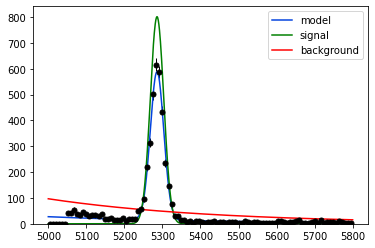

In [24]:
signal=zfit.pdf.Gauss(obs=mass,mu=gaussMean,sigma=gaussWidth).create_extended(Gauss_Norm)
back=zfit.pdf.Exponential(obs=mass,lam=exponent).create_extended(exp_Norm)
pdf=zfit.pdf.SumPDF([signal,back])

#minimize
nll=zfit.loss.ExtendedUnbinnedNLL(model=pdf,data=data)
minimizer=zfit.minimize.Minuit()
result=minimizer.minimize(nll)
result.hesse();
print(result)

lower, upper = mass.limits
data_np = zfit.run(data.value()[:, 0])

# plot the data as a histogramm
bins = 100
counts, bin_edges = histogram(data_np, bins, range=(lower[-1][0], upper[0][0]))
mplhep.histplot((counts, bin_edges), yerr=True, color='black', histtype='errorbar')

# evaluate the func at multiple x and plot
x_plot = linspace(lower[-1][0], upper[0][0], num=1000)
y_plot = zfit.run(pdf.pdf(x_plot, norm_range=mass))
y_gauss = zfit.run(signal.pdf(x_plot, norm_range=mass))
y_exp= zfit.run(back.pdf(x_plot, norm_range=mass))
plt.plot(x_plot, y_plot * data_np.shape[0] / bins*mass.area(), color='xkcd:blue', label='model')
plt.plot(x_plot,y_gauss * data_np.shape[0] / bins*mass.area(), color='green', label='signal')
plt.plot(x_plot, y_exp * data_np.shape[0] / bins*mass.area(), color='red',label='background')
plt.legend();
plt.show()


In [17]:
parameters=result.params
signal_yeld=parameters[Gauss_Norm]["value"]
signal_error=parameters[Gauss_Norm]["hesse"]["error"]
back_yeld=parameters[exp_Norm]["value"]
back_error=parameters[exp_Norm]["hesse"]["error"]

print("signal: {} +/- {}".format(signal_yeld,signal_error))
print("background: {} +/- {}".format(back_yeld,back_error))

signal: 6085.418370024155 +/- 81.18622666116008
background: 2561.6586916470583 +/- 55.38490791794137


In [18]:
totalChargeB_plus="(H1_Charge+H2_Charge+H3_Charge==1)&"
totalChargeB_minus="(H1_Charge+H2_Charge+H3_Charge==-1)&"

B_plus=f["DecayTree"].arrays(library="np", cut=totalChargeB_plus+selection)
B_minus=f["DecayTree"].arrays(library="np",cut=totalChargeB_minus+selection)

FitResult of
<ExtendedUnbinnedNLL model=[<zfit.<class 'zfit.models.functor.SumPDF'>  params=[Composed_autoparam_16, Composed_autoparam_17]] data=[<zfit.core.data.Data object at 0x7fbdac18fd30>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 8.1e-07 │ 994.7998    │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name                 value  (rounded)        hesse    at limit
-----------------  ------------------  -----------  ----------
Signal Yield3                 2909.19  +/-      56       False
Background Yield3             1302.79  +/-      39       False
Mean3                         5283.88  +/-    0.35       False
Width3                        17.4742  +/-    0.29       False
exponent3             

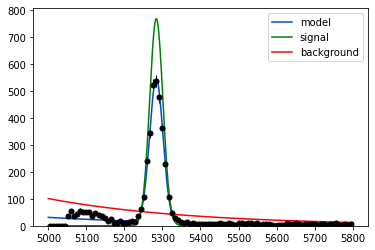

In [26]:
#Model B minus
tree = B_minus
H1_minus=sqrt(square(tree["H1_PX"])+square(tree["H1_PY"])+square(tree["H1_PZ"])) 
H2_minus= sqrt(square(tree["H2_PX"])+square(tree["H2_PY"])+square(tree["H2_PZ"]))
H3_minus= sqrt(square(tree["H3_PX"])+square(tree["H3_PY"])+square(tree["H3_PZ"]))
ptot_mother=sqrt((square(tree["H1_PX"]+tree["H2_PX"]+tree["H3_PX"]) + square(tree["H1_PY"]+tree["H2_PY"]+tree["H3_PY"]) + square(tree["H1_PZ"]+tree["H2_PZ"]+tree["H3_PZ"])))
mkaon = 493.677
E1 = sqrt(square(H1_minus)+mkaon**2)
E2 = sqrt(square(H2_minus)+mkaon**2)
E3 = sqrt(square(H3_minus)+mkaon**2)
M_mother_minus= sqrt(square(E1+E2+E3)-square(ptot_mother))

#fitting 
data=zfit.Data.from_numpy(obs=mass,array=M_mother_minus)
data_np=zfit.run(data.value()[:,0])

signal=zfit.pdf.Gauss(obs=mass,mu=gaussMean,sigma=gaussWidth).create_extended(Gauss_Norm)
back=zfit.pdf.Exponential(obs=mass,lam=exponent).create_extended(exp_Norm)
pdf=zfit.pdf.SumPDF([signal,back])

#minimize
nll=zfit.loss.ExtendedUnbinnedNLL(model=pdf,data=data)
minimizer=zfit.minimize.Minuit()
result=minimizer.minimize(nll)
result.hesse();
print(result)

lower, upper = mass.limits
data_np = zfit.run(data.value()[:, 0])

# plot the data as a histogramm
bins = 100
counts, bin_edges = histogram(data_np, bins, range=(lower[-1][0], upper[0][0]))
mplhep.histplot((counts, bin_edges), yerr=True, color='black', histtype='errorbar')

# evaluate the func at multiple x and plot
x_plot = linspace(lower[-1][0], upper[0][0], num=1000)
y_plot = zfit.run(pdf.pdf(x_plot, norm_range=mass))
y_gauss = zfit.run(signal.pdf(x_plot, norm_range=mass))
y_exp= zfit.run(back.pdf(x_plot, norm_range=mass))
plt.plot(x_plot, y_plot * data_np.shape[0] / bins*mass.area(), color='xkcd:blue', label='model')
plt.plot(x_plot,y_gauss * data_np.shape[0] / bins*mass.area(), color='green', label='signal')
plt.plot(x_plot, y_exp * data_np.shape[0] / bins*mass.area(), color='red', label='background')
plt.legend();
plt.show()

N_minus=result.params[Gauss_Norm]["value"]





FitResult of
<ExtendedUnbinnedNLL model=[<zfit.<class 'zfit.models.functor.SumPDF'>  params=[Composed_autoparam_19, Composed_autoparam_20]] data=[<zfit.core.data.Data object at 0x7fbdac3f63a0>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 5.9e-05 │ 964.0046    │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name                 value  (rounded)        hesse    at limit
-----------------  ------------------  -----------  ----------
Signal Yield3                 3176.45  +/-      59       False
Background Yield3             1258.41  +/-      39       False
Mean3                         5285.79  +/-    0.34       False
Width3                        17.6709  +/-    0.29       False
exponent3             

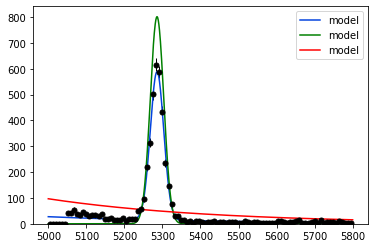

In [27]:
#Model B plus
tree = B_plus
H1_plus=sqrt(square(tree["H1_PX"])+square(tree["H1_PY"])+square(tree["H1_PZ"])) 
H2_plus= sqrt(square(tree["H2_PX"])+square(tree["H2_PY"])+square(tree["H2_PZ"]))
H3_plus= sqrt(square(tree["H3_PX"])+square(tree["H3_PY"])+square(tree["H3_PZ"]))
ptot_mother=sqrt((square(tree["H1_PX"]+tree["H2_PX"]+tree["H3_PX"]) + square(tree["H1_PY"]+tree["H2_PY"]+tree["H3_PY"]) + square(tree["H1_PZ"]+tree["H2_PZ"]+tree["H3_PZ"])))
mkaon = 493.677
E1 = sqrt(square(H1_plus)+mkaon**2)
E2 = sqrt(square(H2_plus)+mkaon**2)
E3 = sqrt(square(H3_plus)+mkaon**2)
M_mother_plus= sqrt(square(E1+E2+E3)-square(ptot_mother))

#fitting 
data=zfit.Data.from_numpy(obs=mass,array=M_mother_plus)
data_np=zfit.run(data.value()[:,0])

signal=zfit.pdf.Gauss(obs=mass,mu=gaussMean,sigma=gaussWidth).create_extended(Gauss_Norm)
back=zfit.pdf.Exponential(obs=mass,lam=exponent).create_extended(exp_Norm)
pdf=zfit.pdf.SumPDF([signal,back])


nll=zfit.loss.ExtendedUnbinnedNLL(model=pdf,data=data)
minimizer=zfit.minimize.Minuit()
result=minimizer.minimize(nll)
result.hesse();
print(result)

lower, upper = mass.limits
data_np = zfit.run(data.value()[:, 0])

# plot the data as a histogramm
bins = 100
counts, bin_edges = histogram(data_np, bins, range=(lower[-1][0], upper[0][0]))
mplhep.histplot((counts, bin_edges), yerr=True, color='black', histtype='errorbar')

# evaluate the func at multiple x and plot
x_plot = linspace(lower[-1][0], upper[0][0], num=1000)
y_plot = zfit.run(pdf.pdf(x_plot, norm_range=mass))
y_gauss = zfit.run(signal.pdf(x_plot, norm_range=mass))
y_exp= zfit.run(back.pdf(x_plot, norm_range=mass))
plt.plot(x_plot, y_plot * data_np.shape[0] / bins*mass.area(), color='xkcd:blue', label='model')
plt.plot(x_plot,y_gauss * data_np.shape[0] / bins*mass.area(), color='green', label='model')
plt.plot(x_plot, y_exp * data_np.shape[0] / bins*mass.area(), color='red', label='model')
plt.legend();
plt.show()

N_plus=result.params[Gauss_Norm]["value"]

In [21]:
A = (N_minus - N_plus)/(N_minus + N_plus)
sigma = sqrt((1-A**2)/(N_minus + N_plus))
print(A)
print(sigma)
#it shows that there is more matter than antimatter

-0.04383479848249636
0.012805954256472385
